In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')


In [3]:
pd.set_option('display.max_columns',None)
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [4]:
df.shape

(991346, 24)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(991320, 24)

In [7]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [8]:
x = df.drop('DRK_YN', axis=1)
y = df[['DRK_YN']]

In [9]:
dringking = ((495488) /(495858+495488))*100
dringking

49.981338503408494

In [10]:
not_drinking = ((495858) / (495858+495488))*100
not_drinking

50.0186614965915

In [11]:
df['DRK_YN'].unique()

array(['Y', 'N'], dtype=object)

<Axes: xlabel='DRK_YN', ylabel='count'>

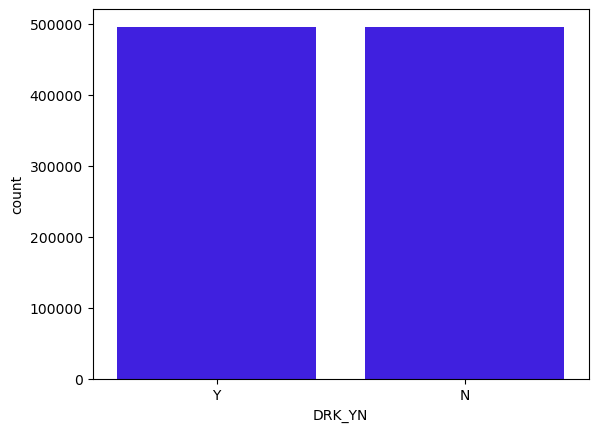

In [12]:
sns.countplot(data=df,x='DRK_YN', color='#2B00FF')

# Basic Visualization

<Axes: xlabel='sex', ylabel='count'>

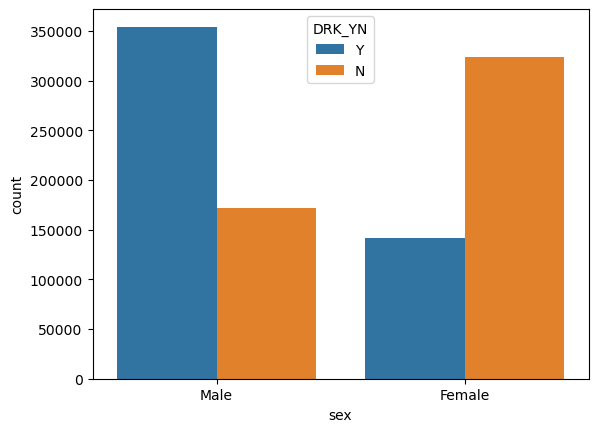

In [13]:
sns.countplot(data=df, x='sex', hue='DRK_YN')

In [14]:
df.age.value_counts()

40    130381
50    129430
45    118353
55    111221
60    106062
35     84722
30     77598
25     64369
65     52957
70     50666
75     25332
20     21970
80     14968
85      3291
Name: age, dtype: int64

<Axes: xlabel='age', ylabel='count'>

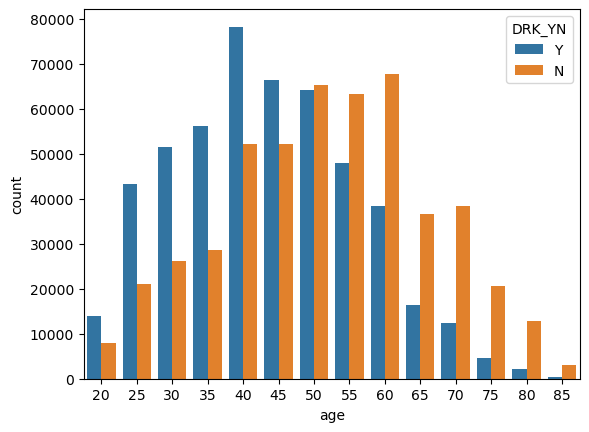

In [15]:
sns.countplot(data=df, x='age',hue='DRK_YN')

# Apply K Fold for Split Data set

In [25]:
from sklearn.model_selection import KFold

In [26]:
kf = KFold(n_splits=int(np.ceil(991320/5)), shuffle=False, random_state=None)

In [27]:

xtrain_list = []
ytrain_list = []

xtest_list = []
ytest_list = []

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
for train_index, test_index in kf.split(x):

    # Create training and test dataframes
    xtrain = x.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = x.iloc[test_index]
    ytest = y.iloc[test_index]

    # Convert the dataframes to numpy arrays
    xtrain_array = xtrain.to_numpy()
    ytrain_array = ytrain.to_numpy()
    xtest_array = xtest.to_numpy()
    ytest_array = ytest.to_numpy()

    # Append the training data to the lists
    xtrain_list.append(xtrain_array)
    ytrain_list.append(ytrain_array)

    # Append the test data to the lists
    xtest_list.append(xtest_array)
    ytest_list.append(ytest_array)

# Convert the lists to numpy arrays
xtrain = np.array(xtrain_list)
ytrain = np.array(ytrain_list)
xtest = np.array(xtest_list)
ytest = np.array(ytest_list)

MemoryError: Unable to allocate 144. MiB for an array with shape (19, 991315) and data type float64